In [1]:
import ssl
import re
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import collections
import numpy as np
import nltk
from nltk.corpus import stopwords

In [2]:
ssl._create_default_https_context = ssl._create_unverified_context

try:
    nltk.data.find('corpora/stopwords.zip')
except LookupError:
    nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

words = {"nm", "bm", "doi", "uv", "may", "cfcs", "pmid", "also"}

In [3]:
def get_content(name):
    url = f"https://en.wikipedia.org/wiki/{name}"
    request = requests.get(url)
    soup = BeautifulSoup(request.text, "html.parser")
    content_div = soup.find("div", class_="mw-content-ltr mw-parser-output")
    cleaned_text = content_div.get_text(strip=True, separator=' ')
    cleaned_text = ' '.join(cleaned_text.split())
    return cleaned_text

In [4]:

def merge_contents(data):
    text = (data.split())
    x = [string.lower() for string in text]
    return x

In [5]:
def words_sort(param):
    text = ' '.join(param)
    text_cleaning = re.sub(r'[^\w\s]', '', text)
    cleaned_list = text_cleaning.split()
    cleaned_list = [word for word in cleaned_list if word.lower() not in stop_words and not any(char.isdigit() for char in word) and all(unwanted_word not in word.lower() for unwanted_word in words)]
    return cleaned_list


In [6]:
def matplotlib(cleaned_list, top_n):
    top = collections.Counter(cleaned_list)
    sorted_word = sorted(top.items(), key=lambda x: x[1], reverse=True)[:top_n][::-1]
    words, frequencies = zip(*sorted_word)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(words)))

    plt.barh(words, frequencies, color=colors)
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title('Word Frequency Chart')
    plt.show()

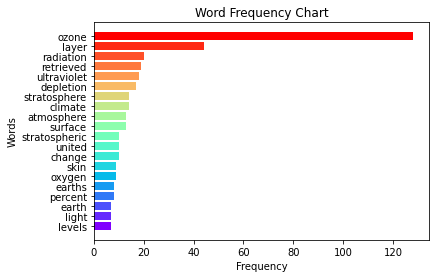

In [7]:
content = get_content("Ozone_layer")
merge_content = merge_contents(content)
cleaned_list = words_sort(merge_content)
matplotlib(cleaned_list, 20)